# Assignment 1A-Constructing a Vanilla Neural Network from scratch
By: Gautham Ravi
Student Id:12724389

As a new data scientist in the house-I have begun constructing my first Vanilla Neural Network. I followed a  
Classic Ml approach. I also have implemented a Vanilla Network using the Random initialization method. For this I have taken queues from the notes of my previous collegue. 

The initilization variables are [3072,10,25,10] for random initialization.
I have reinitialized the variables to [3072,50,20,30,40,20,1] for implementing Xavier and He initialization techniques as extended tasks.



## Packages


In [74]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # To grab the images and extract useful information

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

np.random.seed(42) # Set random seed

## Data


In [75]:
# Set the dataset directory
dataset_dir = os.getcwd() + "/train_selected"

# Get the data labels
labels_file = dataset_dir + "/train_selected.csv"
data_labels = pd.read_csv(labels_file)

data_labels.shape

(4870, 2)

In [3]:
dataset_dir = os.getcwd()

In [76]:
# Get X files
file_list = [dataset_dir + "/" + str(x) + ".png" for x in list(data_labels["id"])]

In [77]:
# Get the labels
data_labels["class"] = np.where(data_labels['label']=='automobile', 1, 0)
data_labels["class"].value_counts()

0    4370
1     500
Name: class, dtype: int64

In [78]:

# A function that will standardise the dataset

def standarise_data(dataset):
    
    new_dataset = dataset/255.
    
    return new_dataset

In [79]:
def load_data():
    global X_train, X_test, y_train, y_test, X, y
    
    X = np.array([np.array(Image.open(fname)) for fname in file_list])
    y = np.array(data_labels["class"])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    y_train = y_train.reshape(1, y_train.shape[0])
    y_test = y_test.reshape(1, y_test.shape[0])
    
    # Reshape the training and test examples 
    X_train_f = X_train.reshape(X_train.shape[0], -1).T
    X_test_f = X_test.reshape(X_test.shape[0], -1).T
    
    # Standardize data to have feature values between 0 and 1.
    X_train = standarise_data(X_train_f)
    X_test = standarise_data(X_test_f)
    

    print ("Flatten X_train: " + str(X_train.shape))
    print ("Flatten X_test: " + str(X_test.shape))
    
    print ("y_train: " + str(y_train.shape))
    print ("y_test: " + str(y_test.shape))
    
    return

In [80]:
load_data()

Flatten X_train: (3072, 3409)
Flatten X_test: (3072, 1461)
y_train: (1, 3409)
y_test: (1, 1461)


## Classic ML methodologies :- logistic regression and tree based models

In [81]:
X_train_clf = X_train.T
X_test_clf = X_test.T

y_train_clf = y_train.T.ravel()
y_test_clf = y_test.T.ravel()

print(X_train_clf.shape, X_test_clf.shape, y_train_clf.shape, y_test_clf.shape)

(3409, 3072) (1461, 3072) (3409,) (1461,)


In [82]:
from sklearn.linear_model import LogisticRegressionCV 
import datetime

C_list = np.linspace(0.001, 0.5, 20)
log_reg = LogisticRegressionCV(
    Cs=C_list, cv=10, penalty='l2', scoring='roc_auc', solver='liblinear', tol =1e-4, max_iter=1000, 
    class_weight='balanced', n_jobs=7, verbose=2, refit=True, multi_class='ovr', random_state=42
)

#Fit to our model
start = datetime.datetime.now()
log_reg.fit(X_train_clf, y_train_clf)
end = datetime.datetime.now()
print("Total time taken: {}".format(end - start))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of  10 | elapsed:  8.1min remaining: 18.8min
[Parallel(n_jobs=7)]: Done  10 out of  10 | elapsed: 11.9min finished


[LibLinear]Total time taken: 0:11:57.169417


In [83]:
#Predict the class
y_test_clf = pd.DataFrame(y_test_clf, columns=["actual"])
y_test_clf["predictions_lr"] = log_reg.predict(X_test_clf)

In [84]:
# Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(y_test_clf.actual, y_test_clf.predictions_lr))

# Get classification report
print(classification_report(y_test_clf.actual, y_test_clf.predictions_lr))

# Get ROC-AUC
print("ROC-AUC Score \n", roc_auc_score(y_test_clf.actual, y_test_clf.predictions_lr))

# Get accuracy
print("Accuracy Score \n", accuracy_score(y_test_clf.actual, y_test_clf.predictions_lr))

Confustion Matrix 
 [[1154  143]
 [  53  111]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1297
           1       0.44      0.68      0.53       164

   micro avg       0.87      0.87      0.87      1461
   macro avg       0.70      0.78      0.73      1461
weighted avg       0.90      0.87      0.88      1461

ROC-AUC Score 
 0.7832874174925251
Accuracy Score 
 0.865845311430527


In [85]:
# A tree based example

from sklearn.ensemble import RandomForestClassifier
import datetime

#Create the model object
rf_class = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', 
    max_depth=15, min_samples_split=3, bootstrap=True, oob_score=True, 
    n_jobs=7, random_state=42, verbose=1, class_weight='balanced' 
)

#Fit to our model
start = datetime.datetime.now()
rf_class.fit(X_train_clf, y_train_clf)
end = datetime.datetime.now()
print("Total time taken: {}".format(end - start))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   10.5s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   23.2s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   39.7s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:   49.3s finished


Total time taken: 0:01:03.004187


In [86]:
#Predict the class
y_test_clf["predictions_rf"] = rf_class.predict(X_test_clf)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [87]:
# Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(y_test_clf.actual, y_test_clf.predictions_rf))

# Get classification report
print(classification_report(y_test_clf.actual, y_test_clf.predictions_rf))

# Get ROC-AUC
print("ROC-AUC Score \n", roc_auc_score(y_test_clf.actual, y_test_clf.predictions_rf))

# Get accuracy
print("Accuracy Score \n", accuracy_score(y_test_clf.actual, y_test_clf.predictions_rf))

Confustion Matrix 
 [[1297    0]
 [ 151   13]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1297
           1       1.00      0.08      0.15       164

   micro avg       0.90      0.90      0.90      1461
   macro avg       0.95      0.54      0.55      1461
weighted avg       0.91      0.90      0.86      1461

ROC-AUC Score 
 0.5396341463414634
Accuracy Score 
 0.8966461327857632


In [ ]:
The logistic regression,tree based method gives me an accuray of eighty five- eightynine %. 
The ROC is 78% and 53% for both the cases.

## Initialization

Going by notes of my predecessor I am initializing my model with [input layer,10,25,10 hidden layers and one output layer]
I am also reinitializing my variables (extension task)- remove comments to run the new initialization

In [332]:


# Creating the layer dimensions as per the brief

layer_dimensions = [3072,10,25,10,1]    ##run this line to verify Random initialization

##layer_dimensions = [3072,50,20,30,40,20,1]  ####run this line to verify Xavier and He initialization
layer_dimensions

[3072, 10, 25, 10, 1]

#                               Random initialization

In [333]:
#The parameter matrix for the above layer dimenions

def initialise_parameters(layer_dimensions):
    """
    Input:
    layer_dimensions -- python (list), one item per layer, number representing size of layer
    
    Output:
    parameters -- python dictionary containing the weight and bias parameters "W1", "b1, ..., "WL", "bL" 
                  with appropriate sizes.
    """
    
    ## Random initialization
    global parameters
    
    np.random.seed(42)
    parameters = {}
    L = len(layer_dimensions)         
    for l in range(1,L):
        parameters['W'+str(l)]= np.random.randn(layer_dimensions[l],layer_dimensions[l-1])*0.01 
        parameters['b'+str(l)]= np.zeros((layer_dimensions[l], 1))
    return parameters

# Xavier and He initialisation - extension task

In [315]:
def initialise_parameters(layer_dimensions,init_type):
    """
    Input:
    layer_dimensions -- python (list), one item per layer, number representing size of layer
    
    Output:
    parameters -- python dictionary containing the weight and bias parameters "W1", "b1, ..., "WL", "bL" 
                  with appropriate sizes.
    """
    
    ## Xaiver initalization and He initialization 

    global parameters
    
    np.random.seed(42)
    parameters = {}
    L = len(layer_dimensions)         
    for l in range(1,L):
        if init_type == "Xavier":
            parameters['W' + str(l)] = np.random.randn(layer_dimensions[l],layer_dimensions[l-1]) * np.sqrt(1/(layer_dimensions[l-1]))         
        elif init_type == "He":   
                 parameters['W' + str(l)] = np.random.randn(layer_dimensions[l],layer_dimensions[l-1]) * np.sqrt(2/(layer_dimensions[l-1]))
            
        parameters['b' + str(l)] = np.zeros((layer_dimensions[l], 1))
    return parameters

## Forward prop- for random initialization
## As per the brief I have used relu activation function and sigmoid for the last layer alone

### Activations for random initialization



In [334]:

def sigmoid(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of sigmoid(z), (should be same shape as Z!)
    cache -- returns Z as well, useful during backpropagation
    """
    
        
    A = 1 / (1 + np.exp(-Z))
    

    cache = Z
    
    return A, cache



In [335]:
def relu(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of relu(z), (should be same shape as Z!)
    cache -- returns Z as well, useful during backpropagation
    """
   
    
    A = np.maximum(0,Z)
    
    cache = Z 
    
    return A, cache

### Forward Prop- 
I am creating a function that will undertake the Linear component of forward propagation

In [336]:

def linear_forward(A, W, b):
    """
    Input:
    A     -- activations from previous layer
    W     -- weights matrix
    b     -- bias vector

    Output:
    Z     -- the input to activation function 
    
    cache -- a python dictionary with "A", "W" and "b" for backprop
    """
       

    Z = np.dot(W,A) + b

    
    cache = (A, W, b)
    
    return Z, cache

# Calling The Activation Function-
I am using the if statement to call the activation functions,sigmiod,relu and tanh

In [338]:

def activation_forward(A_prev, W, b, activation):
    """

    Input:
    A_prev     -- activations from previous layer
    W          -- weights matrix
    b          -- bias vector
    activation -- the activation type to be used ("sigmoid" or "relu")

    Output:
    A          -- the output of the activation function, also called the post-activation value 
    cache      -- a python dictionary with two two caches "linear_cache" and "activation_cache" for backprop
    """

    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
 
  
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache
    

# Architechting the forward pass for the  parameter initialization

In [340]:


def total_forward(X, parameters):
    """
    
    Input:
    X            -- raw data
    parameters   -- dictionary of initialised parameters, output from a particular function above.
    
    Returns:
    AL           -- last post-activation value
    caches       -- list of caches from forward activations
    """

    caches = []
    A = X
    L = len(parameters) // 2    
    
    
    # All the layers up until the last (sigmoid) layer
    for l in range(1, L):
        A_prev = A 
        A, cache = activation_forward(A_prev, 
                                      parameters['W' + str(l)], 
                                      parameters['b' + str(l)], 
                                      activation = "relu")
        caches.append(cache)
    
    # The last layer - 
    
    AL, cache = activation_forward(A, 
                                      parameters['W' + str(L)], 
                                      parameters['b' + str(L)], 
                                      activation = "sigmoid")
    caches.append(cache)
        ### END CODE HERE ###
        
    assert(AL.shape == (1,X.shape[1]))
        
    return AL, caches

## Back prop

### Backwards activations
The Backward activations for the relu and sigmoid functions

In [341]:


def relu_backward(dA, cache):
    """
    Input:
    dA      -- post-activation gradient
    cache   -- 'Z' that is used in the backwards prop here.

    Output:
    dZ      -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.copy(dA) 
    
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
        
    return dZ

def sigmoid_backward(dA, cache):
    
    """
    Input:
    dA      -- post-activation gradient
    cache   -- 'Z' that is used in backprop here

    Returns:
    dZ      -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    s=1/(1+np.exp(-Z))
    dZ=dA*s*(1-s)
    assert(dZ.shape==Z.shape)
    return dZ

### Linear Backwards

In [342]:

def linear_backward(dZ, cache):
    """
    Input:
    dZ        -- Gradient of the cost with respect to 'Z' of current layer
    cache     -- (A_prev, W, b) from forward propag in the current layer, we stored this previously

    Output:
    dA_prev   -- Gradient of the cost w.r.t activation of previous layer
    dW        -- Gradient of the cost w.r.t W of current layer
    db        -- Gradient of the cost w.r.t b of current layer l
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

# I am creating the activation functions created above 

In [344]:


def activation_backward(dA,cache,activation):
    """
    Input:
    dA         -- post-activation gradient for current layer
    cache      -- (linear_cache, activation_cache) stored previously for backprop
    activation -- activation for this layer ("sigmoid" or "relu")
    
    Output:
    dA_prev   -- Gradient of the cost w.r.t activation of previous layer
    dW        -- Gradient of the cost w.r.t W of current layer
    db        -- Gradient of the cost w.r.t b of current layer l
    """
    
    linear_cache, activation_cache = cache

    
    if activation =="relu":
        dZ=relu_backward(dA,activation_cache)
        dA_prev, dW, db=linear_backward(dZ,linear_cache)
        
    elif activation =="sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    
    return dA_prev, dW, db


In [345]:

# Differentiate the loss function with respect to the last activation layer


def total_backward(AL, Y, caches):
    
    """
    
    Input:
    AL        -- probability vector, output of the forward propagation (L_model_forward())
    Y         -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches    -- list of caches from relu and sigmoid we kept from forward prop
    
    output:
    grads     -- A dictionary with the gradients named dA+l,dW+l, db+l for each layer
    """
    
    grads = {}
    L = len(layer_dimensions) - 1 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
    dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], current_cache,activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## Cost function
The binary logistic function

In [346]:


def compute_cost(AL, Y):
    """
    Input:
    AL    -- probability vector for label predictions
    Y     -- truth vector vector

    Output:
    cost  -- cost
    """
    
    m = Y.shape[1]
    
    # Compute loss from aL and y.
    cost_total = (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = (1./m) * cost_total
    
    cost = np.squeeze(cost) # Help with the shape
    assert(cost.shape == ())
    return cost

## Updating the Parameters- based on assesment brief

In [347]:


def update_parameters(parameters, grads, learning_rate):
    """
    
    Input:
    parameters    -- dictionary with parameters 
    grads         -- dictionary with gradients (which function outputs this?)
    learning_date -- step size to adjust parameters by
    
    Returns:
    parameters    -- dictionary containing your updated parameters , same structure as original parameters dict
    """
    
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db"+str(l+1)]
        
    return parameters

## Put it all together

## Random initialisation

In [348]:


def total_backward_forward(X, Y, layers_dimensions, 
                           learning_rate, 
                           num_iterations, 
                           print_cost):
    
    """
    Input:
    X                 -- data
    Y                 -- truth vector (1,0)'s
    layers_dimensions -- list of dimensions for each layer of network
    learning_rate     -- step size for gradient descent
    num_iterations    -- number of training iterations to undertake
    print_cost        -- if True, it prints the cost every 100 steps
    
    output:
    parameters        -- parameters learnt by the model. Used to predict
    """

    np.random.seed(42)
    costs = []
    
    # Parameters initialization
    parameters = initialise_parameters(layer_dimensions)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = total_forward(X,parameters)
        
        # Compute cost
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = total_backward(AL,Y,caches)
 
        # Update parameters.
        parameters = update_parameters(parameters,grads,learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693151
Cost after iteration 100: 0.566041
Cost after iteration 200: 0.487772
Cost after iteration 300: 0.438088
Cost after iteration 400: 0.405449
Cost after iteration 500: 0.383307
Cost after iteration 600: 0.367856
Cost after iteration 700: 0.356813
Cost after iteration 800: 0.348756
Cost after iteration 900: 0.342777
Cost after iteration 1000: 0.338274
Cost after iteration 1100: 0.334840
Cost after iteration 1200: 0.332193
Cost after iteration 1300: 0.330134
Cost after iteration 1400: 0.328520


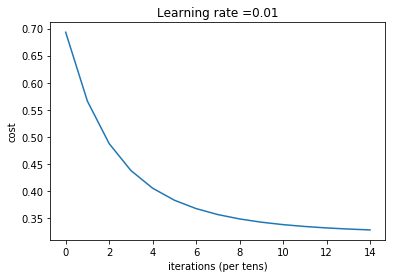

In [349]:
parameters = total_backward_forward(X_train, 
                                    y_train,layer_dimensions,learning_rate=0.01,num_iterations = 1500, 
                                    print_cost = True)

# Xavier initialization

In [297]:


def total_backward_forward(X, Y, 
                           layers_dimensions,
                           init_type, 
                           learning_rate, 
                           num_iterations, 
                           print_cost): 
    """
    Input:
    X                 -- data
    Y                 -- truth vector (1,0)'s
    layers_dimensions -- list of dimensions for each layer of network
    learning_rate     -- step size for gradient descent
    num_iterations    -- number of training iterations to undertake
    print_cost        -- if True, it prints the cost every 100 steps
    
    output:
    parameters        -- parameters learnt by the model. Used to predict
    """

    np.random.seed(42)
    costs = []
    
    # Parameters initialization
    parameters = initialise_parameters(layers_dimensions,init_type);
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = total_forward(X, parameters);
        
        # Compute cost
        cost = compute_cost(AL, Y);
    
        # Backward propagation.
        grads = total_backward(AL, Y, caches,);
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate);
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.699500
Cost after iteration 100: 0.327205
Cost after iteration 200: 0.308045
Cost after iteration 300: 0.275517
Cost after iteration 400: 0.253240
Cost after iteration 500: 0.235235
Cost after iteration 600: 0.221689
Cost after iteration 700: 0.210476
Cost after iteration 800: 0.200324
Cost after iteration 900: 0.190754
Cost after iteration 1000: 0.183385
Cost after iteration 1100: 0.183696
Cost after iteration 1200: 0.178726
Cost after iteration 1300: 0.173549
Cost after iteration 1400: 0.168886


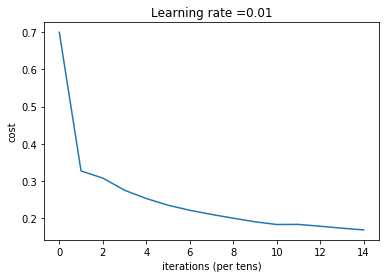

In [298]:
parameters = total_backward_forward(X_train, 
                                    y_train, 
                                    layer_dimensions, 
                                    init_type = "Xavier",
                                    learning_rate= 0.01,
                                    num_iterations = 1500, 
                                    print_cost = True)

# He initialization

In [305]:
def total_backward_forward(X, Y, 
                           layers_dimensions,
                           init_type, 
                           learning_rate, 
                           num_iterations, 
                           print_cost): 
    """
    Input:
    X                 -- data
    Y                 -- truth vector (1,0)'s
    layers_dimensions -- list of dimensions for each layer of network
    learning_rate     -- step size for gradient descent
    num_iterations    -- number of training iterations to undertake
    print_cost        -- if True, it prints the cost every 100 steps
    
    output:
    parameters        -- parameters learnt by the model. Used to predict
    """

    np.random.seed(42)
    costs = []
    
    # Parameters initialization
    parameters = initialise_parameters(layers_dimensions,init_type);
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = total_forward(X, parameters);
        
        # Compute cost
        cost = compute_cost(AL, Y);
    
        # Backward propagation.
        grads = total_backward(AL, Y, caches,);
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate);
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.752340
Cost after iteration 100: 0.262349
Cost after iteration 200: 0.231516
Cost after iteration 300: 0.215384
Cost after iteration 400: 0.203263
Cost after iteration 500: 0.190902
Cost after iteration 600: 0.180463
Cost after iteration 700: 0.173014
Cost after iteration 800: 0.165328
Cost after iteration 900: 0.157380
Cost after iteration 1000: 0.145542
Cost after iteration 1100: 0.136480
Cost after iteration 1200: 0.128667
Cost after iteration 1300: 0.136117
Cost after iteration 1400: 0.112184


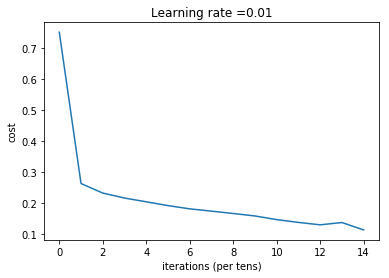

In [306]:
parameters = total_backward_forward(X_train, 
                                    y_train, 
                                    layer_dimensions, 
                                    init_type = "He",
                                    learning_rate= 0.01,
                                    num_iterations = 1500, 
                                    print_cost = True)

## Predictions- Random initialization

In [350]:
## TO DO ##

# Create your own predict function.
# Note the number of training examples
# Turn the probabilities into 0-1 predictions
# Replace False

def predict(X, y, parameters):
    """ 
    Input:
    X           -- data (test set)
    parameters  -- parameters of the trained model
    
    Output:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1] # How many training examples?
    n = len(parameters) // 2
    p = np.zeros((1,m)) # Initialise probabilities to zero
    
    # Forward propagation
    probas, caches = total_forward(X, parameters)
    
    # convert probas to 0/1 predictions.
    for i in range(0,probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p,probas

In [351]:
# Create some predictions
predictions, probas = predict(X_test, y_test, parameters)

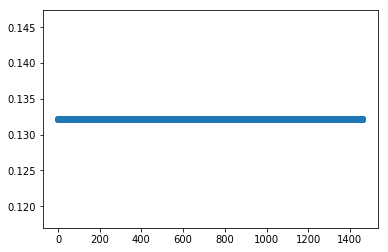

In [352]:
# Make a scatter plot of probabilities. Good check if something is wrong
plt.scatter(range(len(probas[0])), probas)

In [353]:
# Check your prediction value counts
pred_df = pd.DataFrame(predictions.T, columns=["prediction"])
pred_df.prediction.value_counts()

0.0    1461
Name: prediction, dtype: int64

In [354]:
# Do a bit of reshaping
predictions_sk = predictions.reshape(len(predictions.T), 1)
print(predictions_sk.shape)

y_test_sk = y_test.T
print(y_test_sk.shape)

(1461, 1)
(1461, 1)


In [355]:
# Build some sklearn scores

#Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(list(y_test_sk), list(predictions_sk)))

#Get classification report
print(classification_report(y_test_sk, predictions_sk))

# Accuracy score
print("Accuracy: ", accuracy_score(y_test_sk, predictions_sk))

# ROC_AUC score
print("ROC_AUC: ", roc_auc_score(y_test_sk, probas.T))

Confustion Matrix 
 [[1297    0]
 [ 164    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1297
           1       0.00      0.00      0.00       164

   micro avg       0.89      0.89      0.89      1461
   macro avg       0.44      0.50      0.47      1461
weighted avg       0.79      0.89      0.83      1461

Accuracy:  0.8877481177275839
ROC_AUC:  0.6014301295672941


F:\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Predictions- Xavier initialization

In [299]:


def predict(X, y, parameters):
    """ 
    Input:
    X           -- data (test set)
    parameters  -- parameters of the trained model
    
    Output:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1] # How many training examples?
    n = len(parameters) // 2
    p = np.zeros((1,m)) # Initialise probabilities to zero
    
    # Forward propagation
    probas, caches = total_forward(X, parameters)
    
    # convert probas to 0/1 predictions.
    for i in range(0,probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p,probas

In [300]:
# Create some predictions
predictions, probas = predict(X_test, y_test, parameters)

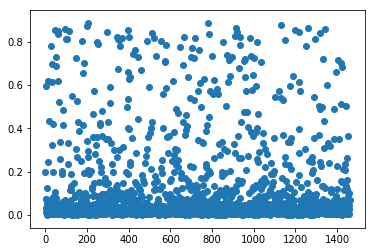

In [301]:
# Scatter plot -Xavier initialization
plt.scatter(range(len(probas[0])), probas)

In [303]:
pred_df = pd.DataFrame(predictions.T, columns=["prediction"])
pred_df.prediction.value_counts()

0.0    1328
1.0     133
Name: prediction, dtype: int64

In [304]:
# Build some sklearn scores

#Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(list(y_test_sk), list(predictions_sk)))

#Get classification report
print(classification_report(y_test_sk, predictions_sk))

# Accuracy score
print("Accuracy: ", accuracy_score(y_test_sk, predictions_sk))

# ROC_AUC score
print("ROC_AUC: ", roc_auc_score(y_test_sk, probas.T))

Confustion Matrix 
 [[1297    0]
 [ 164    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1297
           1       0.00      0.00      0.00       164

   micro avg       0.89      0.89      0.89      1461
   macro avg       0.44      0.50      0.47      1461
weighted avg       0.79      0.89      0.83      1461

Accuracy:  0.8877481177275839
ROC_AUC:  0.874019782988886


F:\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Predictions -He initialisation

In [308]:
def predict(X, y, parameters):
    """ 
    Input:
    X           -- data (test set)
    parameters  -- parameters of the trained model
    
    Output:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1] # How many training examples?
    n = len(parameters) // 2
    p = np.zeros((1,m)) # Initialise probabilities to zero
    
    # Forward propagation
    probas, caches = total_forward(X, parameters)
    
    # convert probas to 0/1 predictions.
    for i in range(0,probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p,probas

In [309]:
# Create some predictions
predictions, probas = predict(X_test, y_test, parameters)

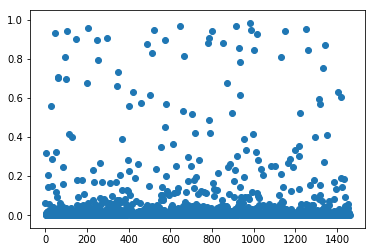

In [310]:
# Scatter plot -He initialization
plt.scatter(range(len(probas[0])), probas)

In [311]:
# Build some sklearn scores

#Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(list(y_test_sk), list(predictions_sk)))

#Get classification report
print(classification_report(y_test_sk, predictions_sk))

# Accuracy score
print("Accuracy: ", accuracy_score(y_test_sk, predictions_sk))

# ROC_AUC score
print("ROC_AUC: ", roc_auc_score(y_test_sk, probas.T))

Confustion Matrix 
 [[1297    0]
 [ 164    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1297
           1       0.00      0.00      0.00       164

   micro avg       0.89      0.89      0.89      1461
   macro avg       0.44      0.50      0.47      1461
weighted avg       0.79      0.89      0.83      1461

Accuracy:  0.8877481177275839
ROC_AUC:  0.8802724862252478


F:\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion


The ROC has improved from 0.60(random initialisation) to 0.87 with Xavier initialistion and with He initialization 
I was able to acheive an ROC of 0.88.
 This is a positive start and He initialisation is the best initialisation method to proceed with this task.

